In [156]:
from matplotlib import pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np

In [157]:
import SimpleITK as sitk

#image = sitk.Image()
#print(Image)

In [158]:
! pwd
% cd /Users/donghoon/공부자료/포스텍정보통신연구소연구부/공모전/sample/sample_cardiac/CHD

/Users/donghoon/공부자료/포스텍정보통신연구소연구부/공모전/sample/sample_cardiac/CHD
/Users/donghoon/공부자료/포스텍정보통신연구소연구부/공모전/sample/sample_cardiac/CHD


In [159]:
! ls ./image
! ls ./label

sample_dia.mha sample_sys.mha
sample_dia_M.mha sample_sys_M.mha


### Use ReadImage() and WriteImage() for IO

In [160]:
image = sitk.ReadImage('./image/sample_dia.mha')
label = sitk.ReadImage('./label/sample_dia_M.mha')
sitk.WriteImage(image, 'qdnal.tif')
!ls -l qdnal.tif

-rw-r--r--  1 donghoon  staff  89696689 12 12 13:35 qdnal.tif


### Origin, Spacing and Direction cosines define 

In [161]:
# Origin : 이미지 픽셀 또는 복셀이 위치한 정지점
# Spacing : Origin간의 사이 간격 ex)Spacing[0] : 픽셀/복셀 간 x좌표 간격 , Spacing[1] : 픽셀/복셀 간 y좌표 간격
# Direction : Mapping/rotation between direction of the pixel/voxel axes and physical directions.
print('=====Image=====')
print('Origin',image.GetOrigin())
print('Spacing',image.GetSpacing())
print('Direction',image.GetDirection())
print('=====label=====')
print('Origin',label.GetOrigin())
print('Spacing',label.GetSpacing())
print('Direction',label.GetDirection())

=====Image=====
Origin (0.0, 0.0, 0.0)
Spacing (0.21875, 0.21875, 0.400024)
Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
=====label=====
Origin (0.0, 0.0, 0.0)
Spacing (1.0, 1.0, 1.0)
Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [162]:
#mage.SetSpacing((1.25,1.25,1.25))
print('Spacing',image.GetSpacing())

Spacing (0.21875, 0.21875, 0.400024)


### From SimpleITK to Numpy

In [163]:
# SimpleITK : image[x,y,z]
# Numpy : image_numpy_array[z,y,x]
nda = sitk.GetArrayFromImage(image)
print(image.GetSize())
print(nda.shape)

(512, 512, 171)
(171, 512, 512)


### From Numpy to SimpleITK

In [164]:
nda = np.zeros((10,20,3))
# 3D scale image
nda_as_image = sitk.GetImageFromArray(nda)
print(nda_as_image.GetSize())
# 2D color image
nda_as_image = sitk.GetImageFromArray(nda,isVector=True)
print(nda_as_image.GetSize())

(3, 20, 10)
(20, 10)


### Pixel Type

In [165]:
print('=====Image=====')
print(image.GetPixelIDTypeAsString())
print(image.GetPixelID())
#print(image.GetPixelID)
print('=====label=====')
print(label.GetPixelIDTypeAsString())
print(label.GetPixelID())

print()
print()
print(sitk.sitkInt16)
print(sitk.sitkUInt16)

=====Image=====
16-bit signed integer
2
=====label=====
8-bit unsigned integer
1


2
3


## Image Construction

1. Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.
2. Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.
3. Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).
4. Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.
5. Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.
### Initial pixel/voxel values are set to zero.

In [166]:
image_3D = sitk.Image(256,128,64,sitk.sitkInt16)
image_2D = sitk.Image(64,64,sitk.sitkFloat32)
image_2D = sitk.Image([32,32],sitk.sitkUInt32)
image_RGB = sitk.Image([128,64],sitk.sitkVectorUInt8,3)
print(image_3D)

Image (0x7fa08099fb10)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 7920
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 128, 64]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 128, 64]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 128, 64]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fa08099fde0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
      Modified Time: 7921
      Debug: Off
      Ob

### Basic Image Attributes
Image Origin, Spacing and Direction을 바꿀 수 있다. 
이미 지정된 데이터를 바꿔보자.

In [167]:
image_3D.SetOrigin((78.0,76.0,77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

(78.0, 76.0, 77.0)
256
128
64


#### image dimension queries

In [168]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


#### what is the depth of a 2D image?

In [169]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


#### Pixel/Voxel type a queries

In [170]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

2
16-bit signed integer
1


### Accessing Pixels and Slicing

In [171]:
help(image_3D.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [172]:
print(image_3D.GetPixel(0,0,0))
image_3D.SetPixel(0,0,0,1)
print(image_3D.GetPixel(0,0,0))
print(image_3D[0,0,1])
image_3D[0,0,1]=2
print(image_3D[0,0,1])

0
1
0
2


#### SimpleITK image들을 slicing하면 image data의 복사본을 반환한다.
#### Numpy 배열과 동일한 문법이다.

Text(0.5,1,'Subsampled')

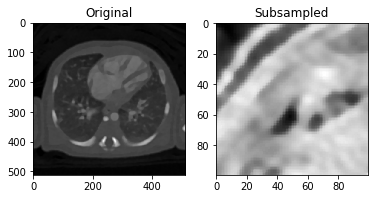

In [175]:
# Plot the original image
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(sitk.GetArrayFromImage(image[:,:,50]), cmap='gray')
ax.set_title('Original')

# Brute force sub-sample
image_subsampled = image[:100,:100,50]
ax = fig.add_subplot(1, 2, 2)
ax.imshow(sitk.GetArrayFromImage(image_subsampled), cmap='gray')
ax.set_title('Subsampled')

Text(0.5,1,'Subsampled')

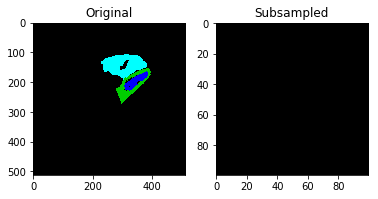

In [177]:
label = sitk.ReadImage('./label/sample_dia_M.mha')
label = sitk.LabelToRGB(label)
# Plot the original image
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(sitk.GetArrayFromImage(label[:,:,50]), cmap='gray')
ax.set_title('Original')

# Brute force sub-sample
label_subsampled = label[:100,:100,50]
ax = fig.add_subplot(1, 2, 2)
ax.imshow(sitk.GetArrayFromImage(label_subsampled), cmap='gray')
ax.set_title('Subsampled')

### Exercises
#### Exercise 1 : 이미지 더하기와 물리적 공간

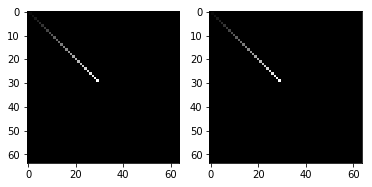

In [178]:
image_a = sitk.Image(64,64,sitk.sitkUInt16)
for i in range(30):
    image_a[i,i] = i

image_b = sitk.Image(image_a.GetSize(),sitk.sitkInt8)
image_b.SetDirection([0,1,0.5,0.5])
image_b.SetSpacing([0.5,0.8])
image_b.SetOrigin([10.0,20.0])
for i in range(30):
    image_b[i,i]=i

fig2 = plt.figure()
ax = fig2.add_subplot(1,2,1)
ax.imshow(sitk.GetArrayFromImage(image_a),cmap='gray')
ax = fig2.add_subplot(1,2,2)
ax.imshow(sitk.GetArrayFromImage(image_b),cmap='gray')


#### Exercies 2 : 이미지 물리적 팽창

In [179]:
def show_in_physical_space(image,column):
    fig = plt.figure()
    ax = fig.add_subplot(2,2,column)
    first_index=(0,0)
    left, bottom = image.TransformIndexToPhysicalPoint(first_index)
    size = image.GetSize()
    # Since indexes count from zero, we must subtract 1
    last_index = (size[0]-1 , size[1] - 1)
    right, top = image.TransformIndexToPhysicalPoint(last_index)
    extent = (left, right, bottom, top)
    print('extent', extent)
    ax.imshow(sitk.GetArrayFromImage(image),extent=extent)
    ax.set_xlim(0.0,100.0)
    ax.set_ylim(0.0,100.0)
    plt.show()

extent (0.0, 19.0, 0.0, 19.0)


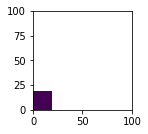

extent (10.0, 86.0, 20.0, 58.0)


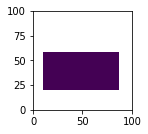

In [180]:
image_a = sitk.Image(20,20,sitk.sitkUInt8)
show_in_physical_space(image_a,1)
image_a.SetOrigin([10.0,20.0])
image_a.SetSpacing([4.0,2.0])
show_in_physical_space(image_a,1)

extent (0.0, 111.78125, 0.0, 111.78125)


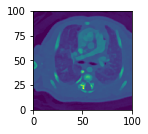

extent (10.0, 2054.0, 20.0, 1042.0)


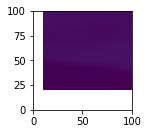

In [181]:
image_c = sitk.Image(image[:,:,100])
show_in_physical_space(image_c,1)
image_c.SetOrigin([10.0,20.0])
image_c.SetSpacing([4.0,2.0])
show_in_physical_space(image_c,1)

### Resampling Images
### Overview
### Output image 정보 정의하기
#### * image resampling 할 때, 첫번째로 이미지 정보를 정의해줘야 한다. Origin, Spacing, Direction과 같은 것들
#### * 반환된 sample의 grid를 결정한다
#### * input image와 똑같을 필요는 없다.

### resample된 pixel값 찾기
#### output image의 각각의 pixel에 대해서 :
#### 1. 물리적 공간안의 위치 index 값 변환 -> 전체 공간에서 위치 변환
#### 2. 공간적으로 변환적용 -> 다양한 방법으로 변환
#### 3. resample 된 이미지위의 연속된 index로 물리적 공간 변환 -> 떼어내기
#### 4. 근접한 pixel로 interpolate(보간) -> pixel을 보정하는 작업

### 다른 보간법들
#### * sitkNearestNeighbor
#### * sitkLinear
#### * sitkBSpline
#### * sitkGaussian
#### * sitkHarmmingWindowedSinc
#### * sitkCosineWindowedSinc
#### * sitkWelchWindowedSinc
#### * sitkLanczosWindowedSinc
#### * sitkBlackmanWindowedSinc

### Resampling 과 Registration 프레임워크
#### Registration은 공간 변환시 등록 될 두 이미지를 샘플링하는 것을 포함한다
#### Sampling된 값은 유사성 메트릭과 비교된다
#### Optimizer는 공간 변환 파라미터를 개선시키는데 사용된다

# Tutorial
### SimpleITK를 사용해 많은 공간 변환해보기

The simplest is the Identity Transform. This transform simply returns input points unaltered.

In [182]:
dimension = 2
print("*Identity Transform*")
identity = sitk.Transform(dimension, sitk.sitkIdentity)
print("Dimension : "+str(identity.GetDimension()))

# Point들은 항상 물리적 공간안에 정의된다.
point = (1.0, 1.0)
def transform_point(transform, point):
    transformed_point = transform.TransformPoint(point)
    print('Point '+str(point) + ' transformed is ' + str(transformed_point))
    
transform_point(identity,point)

*Identity Transform*
Dimension : 2
Point (1.0, 1.0) transformed is (1.0, 1.0)


For the TranslationTransform, the Parameters are the values of the translation Offset.

In [183]:
print('*Translation Transform*')
translation = sitk.TranslationTransform(dimension)

print('Parameters : '+ str(translation.GetParameters()))
print('Offset : '+ str(translation.GetOffset()))
print('FixedParameters: '+ str(translation.GetFixedParameters()))
transform_point(translation,point)

print('')
translation.SetParameters((3.1,4.4))
print('Parameters : '+ str(translation.GetParameters()))
transform_point(translation, point)

*Translation Transform*
Parameters : (0.0, 0.0)
Offset : (0.0, 0.0)
FixedParameters: ()
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters : (3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


The affine transform is capable of representing translations, rotations, shearing, and scaling.

In [184]:
print('*Affine Transform*')
affine = sitk.AffineTransform(dimension)

print('Parameters : '+ str(affine.GetParameters()))
print('FixedParameters : '+ str(affine.GetFixedParameters()))
transform_point(affine,point)

print('')
affine.SetTranslation((3.1,4.4))
print('Parameters : ' +str(affine.GetParameters()))
transform_point(affine,point)

*Affine Transform*
Parameters : (1.0, 0.0, 0.0, 1.0, 0.0, 0.0)
FixedParameters : (0.0, 0.0)
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters : (1.0, 0.0, 0.0, 1.0, 3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


### Image에 Transform 적용해보기

In [185]:
def myshow(img, title = None, margin=0.05, dpi=80):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    
    ysize = nda.shape[0]
    xsize = nda.shape[1]
    
    figsize = (1+margin) * ysize /dpi, (1+margin) * xsize /dpi
    
    fig = plt.figure(title, figsize = figsize , dpi = dpi)
    ax = fig.add_axes([margin,margin,1 - 2*margin, 1-2*margin])
    
    extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    
    t = ax.imshow(nda, extent=extent , interpolation = 'hamming', cmap= 'gray', origin='lower')
    if(title):
        plt.title(title)
    plt.show()

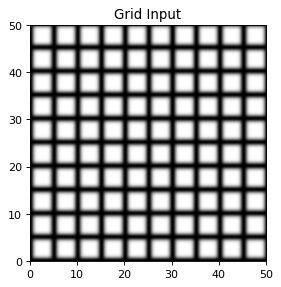

<class 'SimpleITK.SimpleITK.Image'>


In [197]:
grid = sitk.GridSource(outputPixelType = sitk.sitkUInt16,
                       size=(250,250),
                       sigma=(0.5,0.5),
                       gridSpacing=(5.0,5.0),
                      gridOffset = (0.0,0.0),
                       spacing=(0.2,0.2))
myshow(grid,'Grid Input')
print(type(grid))

(3.1, 4.6)
(3.1, 4.6)
Point (1.0, 1.0) transformed is (4.1, 5.6)


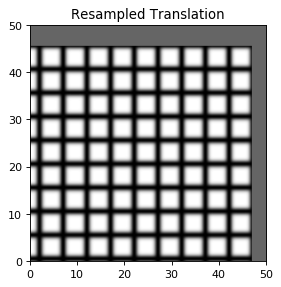

In [187]:
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction 들은 레퍼런스에서 가져옵니다.
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform, interpolator, default_value)

translation.SetOffset((3.1,4.6))
print(translation.GetParameters())
print(translation.GetOffset())
transform_point(translation,point)
resampled = resample(grid, translation)
myshow(resampled, 'Resampled Translation')

## 무슨일이 일어났지? 
### 왜 Output Image가 아래로 이동하고 왼쪽으로 이동했지? resampling operation이 어떻게 적용되지 잘 살펴보자. 매우 중요하다.

affine(line preseving) transformation, can perform translation:

Point (1.0, 1.0) transformed is (-2.1, -3.5999999999999996)


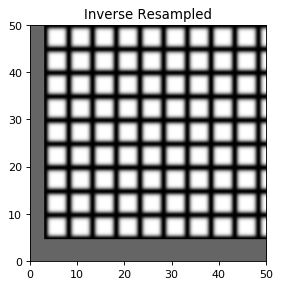

In [188]:
translation.SetOffset(-1*np.array(translation.GetParameters()))
transform_point(translation,point)
resampled = resample(grid,translation)
myshow(resampled,'Inverse Resampled')

In [189]:
def affine_translate(transform,x_translation=3.1,y_translation=4.6):
    new_transform =sitk.AffineTransform(transform)
    new_transform.SetTranslation((x_translation,y_translation))
    resampled = resample(grid,new_transform)
    myshow(resampled,'Translated')
    return new_transform

affine = sitk.AffineTransform(dimension)
interact(affine_translate, transform = fixed(affine), x_translation = (-5.0, 5.0), y_translation = (-5.0,5.0))

interactive(children=(FloatSlider(value=3.1, description='x_translation', max=5.0, min=-5.0), FloatSlider(valu…

<function __main__.affine_translate(transform, x_translation=3.1, y_translation=4.6)>

or scaling :

In [190]:
def affine_scale(transform, x_scale=3.0,y_scale=0.7):
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,0] = x_scale
    matrix[1,1] = y_scale
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(grid, new_transform)
    myshow(resampled,'Scaled')
    print(matrix)
    return new_transform

affine = sitk.AffineTransform(dimension)

interact(affine_scale, transform = fixed(affine), x_scale = (0.2,5.0),y_scale=(0.2, 5.0))


interactive(children=(FloatSlider(value=3.0, description='x_scale', max=5.0, min=0.2), FloatSlider(value=0.7, …

<function __main__.affine_scale(transform, x_scale=3.0, y_scale=0.7)>

or rotation :

In [191]:
def affine_rotate(transform, degrees=15.0):
    parameters = np.array(transform.GetParameters())
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    radians = -np.pi * degrees / 180.
    rotation = np.array([[np.cos(radians),-np.sin(radians)],[np.sin(radians),np.cos(radians)]])
    new_matrix = np.dot(rotation,matrix)
    new_transform.SetMatrix(new_matrix.ravel())
    resampled = resample(grid,new_transform)
    print(new_matrix)
    myshow(resampled, 'Rotated')
    return new_transform

affine = sitk.AffineTransform(dimension)

interact(affine_rotate, transform=fixed(affine), degrees=(-90.0, 90.0))


interactive(children=(FloatSlider(value=15.0, description='degrees', max=90.0, min=-90.0), Output()), _dom_cla…

<function __main__.affine_rotate(transform, degrees=15.0)>

In [192]:
def affine_shear(transform, x_shear=0.3,y_shear=0.1):
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,1] = -x_shear
    matrix[1,0] = -y_shear
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(grid , new_transform)
    myshow(resampled, ' Sheared')
    print(matrix)
    return new_transform

affine = sitk.AffineTransform(dimension)

interact(affine_shear, transform=fixed(affine), x_shear = (0.1, 2.0), y_shear = (0.1, 2.0))

interactive(children=(FloatSlider(value=0.3, description='x_shear', max=2.0, min=0.1), FloatSlider(value=0.1, …

<function __main__.affine_shear(transform, x_shear=0.3, y_shear=0.1)>

### Composite Transform (합성 변환)
한 개의 변환 object에 여러개의 변환을 합성할 수도 있다. 복합 변환을 사용하면, 여러 재 샘플링 작업이 방지되므로 보간 오류가 누적되지 않는다. 예를들어, 변환 및 회전으로 구성된 affine 변환이 있다.

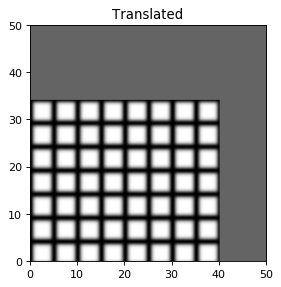

[[ 0.93969262  0.34202014]
 [-0.34202014  0.93969262]]


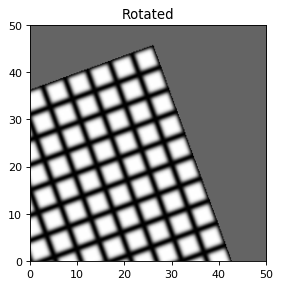

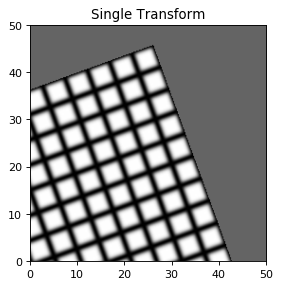

In [193]:
translate = (10.0, 16.0)
rotate = 20.0

affine = sitk.AffineTransform(dimension)
#translate 변환
affine = affine_translate(affine, translate[0], translate[1])
#translate 변환 + roate 변환 affine
affine = affine_rotate(affine, rotate)
#grid에 affine 변환 적용하여 resample 된 데이터 반환
resampled = resample(grid, affine)
myshow(resampled, 'Single Transform')

합성변환으로 순차적으로 적용된 두 개의 변환 object로 표현할 수도 있다. 

[[ 0.93969262  0.34202014]
 [-0.34202014  0.93969262]]


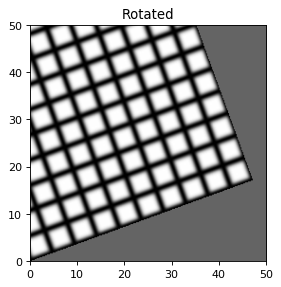

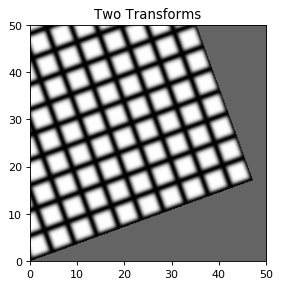

In [194]:
translation = sitk.TranslationTransform(dimension)
translation.SetOffset(-1*np.array(translate))
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(translation)
affine = sitk.AffineTransform(dimension)
affine = affine_rotate(affine, rotate)

composite.AddTransform(translation)
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(affine)

resampled = resample(grid, composite)
myshow(resampled, 'Two Transforms')

조심할것 , 변환은 noncommutative한 순서의 일이다.
순서에 따라 결과물이 달라진다

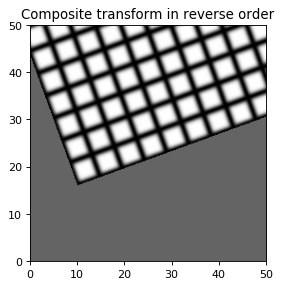

In [195]:
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(affine)
composite.AddTransform(translation)

resampled = resample(grid, composite)
myshow(resampled, 'Composite transform in reverse order')

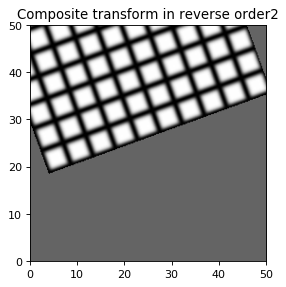

In [196]:
composite2 = sitk.Transform(dimension, sitk.sitkComposite)
composite2.AddTransform(translation)
composite2.AddTransform(affine)

resampled = resample(grid, composite2)
myshow(resampled, 'Composite transform in reverse order2')